# **Deep Learning Model for Facial Emotion Recognition**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from keras.preprocessing.image import *
from keras.applications import *
import cv2

## **Data Collection & Preparation**

Dataset is **FER-2013** can be found on kaggle at [FER-2013](https://www.kaggle.com/datasets/msambare/fer2013)

In [2]:
train_path = 'EmotionsDataset/train'
test_path = 'EmotionsDataset/test'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_datagen.flow_from_directory(train_path, target_size=(48,48), batch_size=64, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=(48,48), batch_size=64, class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
train_data.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

## **Model Building**

In [6]:
# Callbacks
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] == 0.99:
            print('Accuracy is 99%. Training will be stopped.')
            self.model.stop_training = True
            
callbacks = myCallback()

In [28]:
with tf.device('/GPU:0'):
    
    # Implement Deep Learning Model
    base_model = VGG16(input_shape=(48, 48, 3), include_top=False, weights='imagenet', pooling='max')
    base_model.layers[0].trainable = True
    
    base_out = base_model.output
    
    dropout_layer = Dropout(0.5)(base_out)
    
    classifier = Dense(7, activation='softmax')(dropout_layer)
    
    model = Model(inputs=base_model.input, outputs=classifier)

    #model.summary()

## **Model Definition & Training**

In [34]:
#opt = RMSprop(learning_rate=0.001)
model.compile(optimizer='rmnsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_data, epochs=10, validation_data=test_data, callbacks=[callbacks])

In [ ]:
model.save('emotion_recongition')

In [40]:
# using the previously trained model to achieve higher accuracy
model_x = load_model('emotion_recongition.h5')
hist_x = model_x.fit(train_data, epochs=10, validation_data=test_data, callbacks=[callbacks])

Epoch 1/10
449/449 [==============================] - 1356s 3s/step - loss: 0.9305 - accuracy: 0.6570 - val_loss: 1.1378 - val_accuracy: 0.5936
Epoch 2/10
449/449 [==============================] - 1355s 3s/step - loss: 0.8597 - accuracy: 0.6852 - val_loss: 1.1914 - val_accuracy: 0.5952
Epoch 3/10
449/449 [==============================] - 744s 2s/step - loss: 0.7988 - accuracy: 0.7101 - val_loss: 1.1251 - val_accuracy: 0.6109
Epoch 4/10
449/449 [==============================] - 483s 1s/step - loss: 0.7429 - accuracy: 0.7318 - val_loss: 1.2151 - val_accuracy: 0.6145
Epoch 5/10
449/449 [==============================] - 484s 1s/step - loss: 0.6918 - accuracy: 0.7550 - val_loss: 1.1826 - val_accuracy: 0.6092
Epoch 6/10
449/449 [==============================] - 487s 1s/step - loss: 0.6443 - accuracy: 0.7754 - val_loss: 1.3387 - val_accuracy: 0.5913
Epoch 7/10
449/449 [==============================] - 485s 1s/step - loss: 0.6042 - accuracy: 0.7935 - val_loss: 1.2859 - val_accuracy: 0.61

In [62]:
model_x.save('emotion_recognition_final.h5')

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Results**

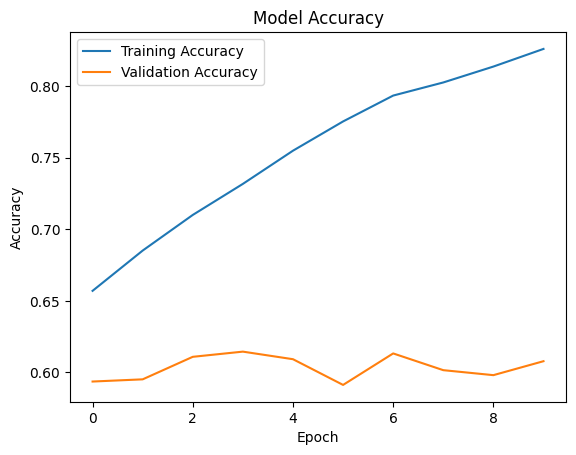

In [52]:
# Model Accuracy Plots
plt.plot(hist_x.history['accuracy'], label='Training Accuracy')
plt.plot(hist_x.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

<Figure size 640x480 with 0 Axes>

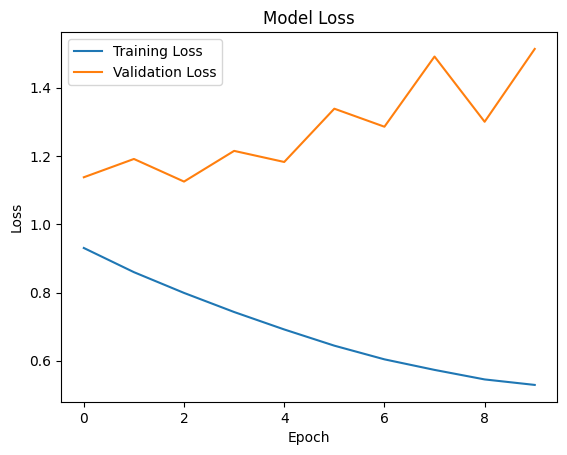

<Figure size 640x480 with 0 Axes>

In [53]:
# Model Loss Plots
plt.plot(hist_x.history['loss'], label='Training Loss')
plt.plot(hist_x.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

In [54]:
# Comparing predictions with true values

actual_emotions = []
predicted_emotions = []


for i in os.listdir('EmotionsDataset/test/angry/'):
  image = load_img('EmotionsDataset/test/angry/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(0)

for i in os.listdir('EmotionsDataset/test/disgusted/'):
  image = load_img('EmotionsDataset/test/disgusted/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(1)

for i in os.listdir('EmotionsDataset/test/fearful/'):
  image = load_img('EmotionsDataset/test/fearful/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(2)

for i in os.listdir('EmotionsDataset/test/happy/'):
  image = load_img('EmotionsDataset/test/happy/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(3)

for i in os.listdir('EmotionsDataset/test/neutral/'):
  image = load_img('EmotionsDataset/test/neutral/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(4)

for i in os.listdir('EmotionsDataset/test/sad/'):
  image = load_img('EmotionsDataset/test/sad/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(5)

for i in os.listdir('EmotionsDataset/test/surprised/'):
  image = load_img('EmotionsDataset/test/surprised/'+i, target_size=(48,48))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  p = (model.predict(image) > 0.5).astype('int32')
  predicted_class = p.argmax()
  predicted_emotions.append(predicted_class)
  actual_emotions.append(6)

1/1 [==============================] - 0s 24ms/step


## **Evaluation Metrics**

In [55]:
# Classification Report
print(classification_report(actual_emotions, predicted_emotions))

              precision    recall  f1-score   support

           0       0.12      0.21      0.15       958
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1024
           3       0.24      0.07      0.11      1774
           4       0.17      0.69      0.27      1233
           5       1.00      0.00      0.00      1247
           6       0.00      0.00      0.00       831

    accuracy                           0.16      7178
   macro avg       0.22      0.14      0.08      7178
weighted avg       0.28      0.16      0.10      7178



c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

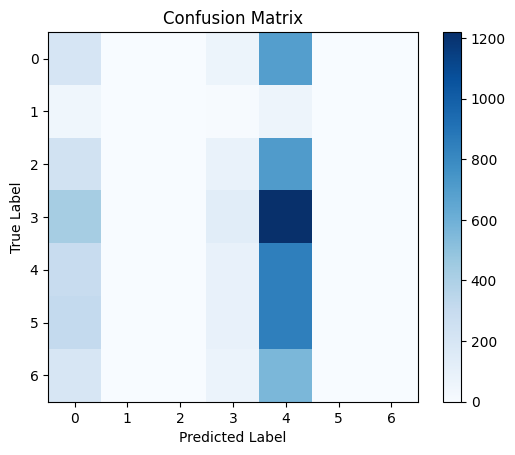

In [57]:
# Confusion Matrix
conf_matrix = confusion_matrix(actual_emotions, predicted_emotions)

plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Real-Time Facial Emotion Recognition**

In [69]:
# Helper Functions
def preprocess_image(img):
    # Convert to opencv format
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # resize to match the input size of the CNN
    img = cv2.resize(img, (48,48))
    # Preprocess for VGG16
    img = keras.applications.vgg16.preprocess_input(img.astype(np.float32))
    # Expand dimensions 
    img = np.expand_dims(img, axis=0)
    return img
    
def predict_emotion(model, image):
    emotions = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    # Load face detection cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face
        roi = image[y:y+h, x:x+w]

        # Preprocess the face ROI for emotion prediction
        processed_face = preprocess_image(roi)

        # Predict emotion
        prediction = model.predict(processed_face)[0]
        emotion_index = np.argmax(prediction)

        # Draw a rectangle around the face
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Display the predicted emotion above the face
        predicted_emotion = emotions[emotion_index]
        cv2.putText(image, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    return image

In [70]:
# Capture video from webcam

cap = cv2.VideoCapture(0)

while True:
    # Read image from video stream
    _, image = cap.read()
   
    model_1 = load_model('emotion_recognition_final.h5')

    # facial emotion recofnition
    processed_image = predict_emotion(model_1, image)

    # Display the result
    cv2.imshow('Facial Emotion Recognition', processed_image)

    # Exit if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release capture resources
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 77ms/step
